In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Code.toolbox import compare_freq
from Code.Tutorial.filter_savgol import savgol_filter
from Code.Tutorial.algo_ssa import SSA


In [4]:
from Code.Tutorial.Dataset import load_scg

def load_(path):
    data = np.load(path)
    signals, labels = data[:, :1000], data[:, 1000:]
    return signals, labels

signals_n_0, labels_n_0 = load_('../../Data/Normal/sim_5000_0_90_140_train_normal.npy')
signals_n_1, labels_n_1 = load_('../../Data/Normal/sim_5000_0.1_90_140_train_normal.npy')
signals_n_4, labels_n_4 = load_('../../Data/Normal/sim_5000_0.4_90_140_train_normal.npy')
signals_n_8, labels_n_8 = load_('../../Data/Normal/sim_5000_0.8_90_140_train_normal.npy')

signals_l_0, labels_l_0, duration, fs = load_scg(0, 'train')
signals_l_1, labels_l_1, _, _ = load_scg(0.1, 'train')
signals_l_8, labels_l_8, _, _ = load_scg(0.8, 'train')

In [5]:
from Code.Tutorial.filter_savgol import savgol_filter

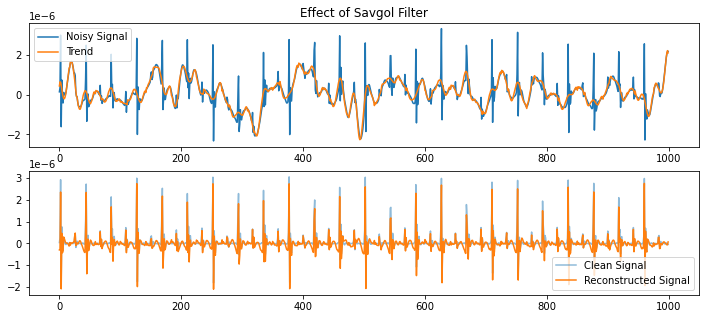

In [21]:
idx = 1
signal_l_8 = signals_l_8[idx]

plt.subplots(2, 1, figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.title('Effect of Savgol Filter')

savgol_signal_l_8 = savgol_filter(signal_l_8, 32 , 6)
plt.plot(signal_l_8, label='Noisy Signal')
plt.plot(savgol_signal_l_8, label='Trend')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(signals_l_0[idx], alpha=0.5, label='Clean Signal')

plt.plot(signal_l_8 - savgol_signal_l_8, label='Reconstructed Signal')
plt.legend()
plt.savefig('./pic/Effect_Savgol_Filter.jpg', dpi=300)

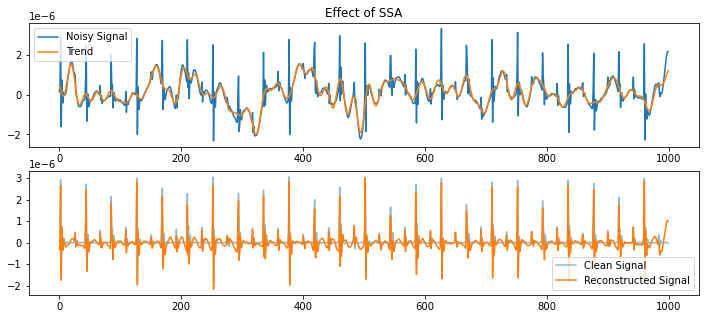

In [23]:
ssa_ = SSA(signal_l_8, 100)

ssa_reconstructed_signal = ssa_.reconstruct(slice(10, 100))


plt.subplots(2, 1, figsize=(12, 5))
plt.subplot(2, 1, 1)
ssa_.orig_TS.plot(label='Noisy Signal')
ssa_.reconstruct(slice(0, 10)).plot(label='Trend')
plt.title('Effect of SSA')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signals_l_0[idx], alpha=0.5, label='Clean Signal')
ssa_.reconstruct(slice(10, 100)).plot(label='Reconstructed Signal')
# plt.title('Noisy Signal and Reconstructed Signal')
plt.legend()
plt.savefig('./pic/Effect_SSA.jpg', dpi=300)
